In [2]:
import torch

In [16]:
import torch
import torch.nn.functional as F

image = torch.rand(6, 6)
print("Original Image:")
print(image)
print("Image shape:", image.shape)

image = image.unsqueeze(dim=0)
image = image.unsqueeze(dim=0)
kernel = torch.ones(3, 3)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)
for i in range(1,5):
    outimage_stride_1 = F.conv2d(image, kernel, stride=i, padding=0)
#     print(f"\nOutput image with stride={i} and padding=0:")
#     print(outimage_stride_1)
    print(f"Output image shape with stride={i} and padding=0:", outimage_stride_1.shape)

for i in range(1,5):
    outimage_padding_1 = F.conv2d(image, kernel, stride=1, padding=i)
    print(f"Output image shape with stride=1 and padding={i}:", outimage_padding_1.shape)

H, W = 6, 6
K_H, K_W = 3, 3
S = 1
P = 0

out_height = (H + 2 * P - K_H) // S + 1
out_width = (W + 2 * P - K_W) // S + 1
print("\nManually calculated output size with stride=1 and padding=0:")
print(f"Output Height: {out_height}, Output Width: {out_width}")

num_parameters = (1 * K_H * K_W + 1) * 1
print("\nTotal number of parameters in the network:")
print(f"Number of parameters: {num_parameters}")


Original Image:
tensor([[0.1006, 0.3554, 0.2688, 0.8345, 0.5970, 0.2604],
        [0.5133, 0.4165, 0.2566, 0.3124, 0.0139, 0.3020],
        [0.6886, 0.8327, 0.7908, 0.8239, 0.8280, 0.9095],
        [0.0840, 0.3973, 0.1436, 0.0960, 0.1514, 0.9119],
        [0.4781, 0.6928, 0.5806, 0.1614, 0.1821, 0.3415],
        [0.3033, 0.8016, 0.1219, 0.5875, 0.8990, 0.1913]])
Image shape: torch.Size([6, 6])
Output image shape with stride=1 and padding=0: torch.Size([1, 1, 4, 4])
Output image shape with stride=2 and padding=0: torch.Size([1, 1, 2, 2])
Output image shape with stride=3 and padding=0: torch.Size([1, 1, 2, 2])
Output image shape with stride=4 and padding=0: torch.Size([1, 1, 1, 1])
Output image shape with stride=1 and padding=1: torch.Size([1, 1, 6, 6])
Output image shape with stride=1 and padding=2: torch.Size([1, 1, 8, 8])
Output image shape with stride=1 and padding=3: torch.Size([1, 1, 10, 10])
Output image shape with stride=1 and padding=4: torch.Size([1, 1, 12, 12])

Manually calcu

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a random image of shape (6, 6) - grayscale image (1 channel)
image = torch.rand(6, 6)
print("Original Image:")
print(image)
print("Image shape:", image.shape)

# Add a new dimension for batch size: Shape becomes (1, 1, 6, 6)
image = image.unsqueeze(dim=0).unsqueeze(dim=0)
# print("\nImage after adding batch and channel dimensions:")
# print(image)
# print("Image shape:", image.shape)

# Define a Conv2d layer with out_channels=3 (without bias)
conv2d_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=0, bias=False)

# Perform convolution using Conv2d
output_conv2d = conv2d_layer(image)
# print("\nOutput of torch.nn.Conv2d:")
# print(output_conv2d)
print("Output shape of torch.nn.Conv2d:", output_conv2d.shape)

# Manually get the weights from the Conv2d layer (kernel weights)
weights = conv2d_layer.weight
print("\nKernel weights of Conv2d layer:")
print(weights)

# Perform convolution using torch.nn.functional.conv2d
output_conv2d_func = F.conv2d(image, weights, stride=1, padding=0)
# print("\nOutput of torch.nn.functional.conv2d:")
# print(output_conv2d_func)
print("Output shape of torch.nn.functional.conv2d:", output_conv2d_func.shape)

# Check if both outputs are the same
print("\nAre both outputs equal?")
print(torch.allclose(output_conv2d, output_conv2d_func))  # This should print True

Original Image:
tensor([[0.6231, 0.8383, 0.5623, 0.8281, 0.5416, 0.4874],
        [0.5347, 0.7825, 0.4359, 0.4484, 0.4072, 0.7055],
        [0.1269, 0.5642, 0.7883, 0.5128, 0.1512, 0.1253],
        [0.3828, 0.6480, 0.5351, 0.6008, 0.8684, 0.3050],
        [0.0463, 0.3788, 0.9357, 0.4322, 0.5504, 0.6083],
        [0.0117, 0.6433, 0.6954, 0.6561, 0.6501, 0.1530]])
Image shape: torch.Size([6, 6])
Output shape of torch.nn.Conv2d: torch.Size([1, 3, 4, 4])

Kernel weights of Conv2d layer:
Parameter containing:
tensor([[[[-0.1713, -0.0934, -0.0588],
          [ 0.0677,  0.2818,  0.3025],
          [ 0.1478,  0.0669,  0.3175]]],


        [[[ 0.2629, -0.2471, -0.1722],
          [ 0.0197, -0.2351,  0.1485],
          [ 0.0358, -0.2120, -0.1054]]],


        [[[ 0.3182,  0.1489, -0.0535],
          [ 0.0294,  0.0622, -0.1829],
          [-0.1748,  0.1794,  0.3223]]]], requires_grad=True)
Output shape of torch.nn.functional.conv2d: torch.Size([1, 3, 4, 4])

Are both outputs equal?
True


Epoch [1/5], Loss: 0.26869660533710454
Epoch [2/5], Loss: 0.07857691766872907
Epoch [3/5], Loss: 0.05701603200649028
Epoch [4/5], Loss: 0.04536046365084601
Epoch [5/5], Loss: 0.0359298175320338


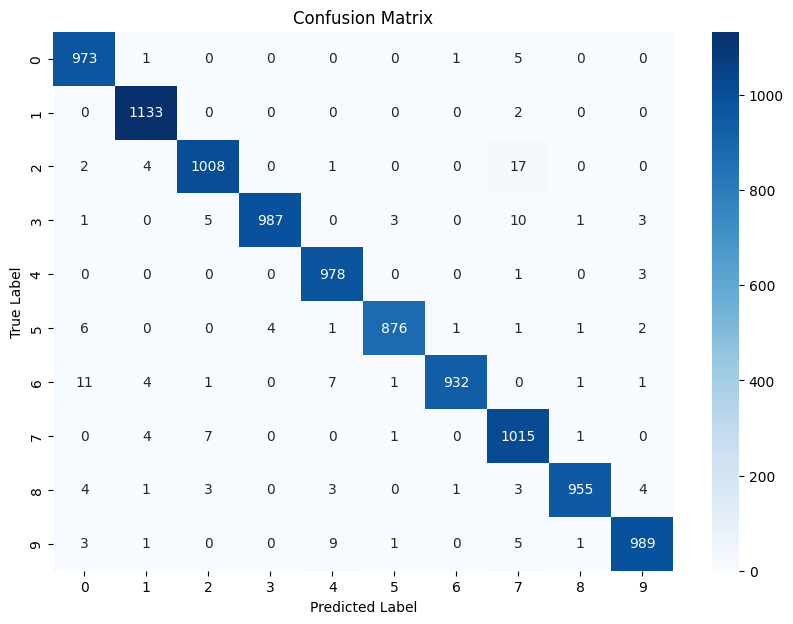


Number of learnable parameters in the model: 149798


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# CNN Model Architecture
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        # Convolutional layers
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3),  # First Conv Layer
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),  # MaxPooling
            nn.Conv2d(64, 128, kernel_size=3),  # Second Conv Layer
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),  # MaxPooling
            nn.Conv2d(128, 64, kernel_size=3),  # Third Conv Layer
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)  # MaxPooling
        )
        # Fully connected layer (classification head)
        self.classification_head = nn.Sequential(
            nn.Linear(64, 20, bias=True),  # Adjusted size for the fully connected layer
            nn.ReLU(),
            nn.Linear(20, 10, bias=True)  # Output layer: 10 classes (digits 0-9)
        )

    def forward(self, x):
        # Pass through convolutional layers
        features = self.net(x)
        # Flatten the feature map to pass it to the fully connected layers
        features = features.view(features.size(0), -1)
        # Pass through classification head
        return self.classification_head(features)


# Load the MNIST dataset with necessary transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model, loss function, and optimizer
model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Function to calculate the number of learnable parameters in the model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Training the model
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update parameters
            running_loss += loss.item()

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader)}")


# Function to evaluate the model and compute confusion matrix
def evaluate(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds)
            all_labels.append(labels)

    # Concatenate all predictions and labels
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    # Compute confusion matrix
    cm = confusion_matrix(all_labels.numpy(), all_preds.numpy())

    return cm


# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()


# Training the model
train(model, train_loader, criterion, optimizer, epochs=5)

# Evaluate the model and get confusion matrix
conf_matrix = evaluate(model, test_loader)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, classes=[str(i) for i in range(10)])

# Number of learnable parameters in the model
num_params = count_parameters(model)
print(f"\nNumber of learnable parameters in the model: {num_params}")

Epoch [1/5], Loss: 0.22472988295285448
Epoch [2/5], Loss: 0.05724089176355323
Epoch [3/5], Loss: 0.041771630411530765
Epoch [4/5], Loss: 0.031994506858089675
Epoch [5/5], Loss: 0.026517841597283775


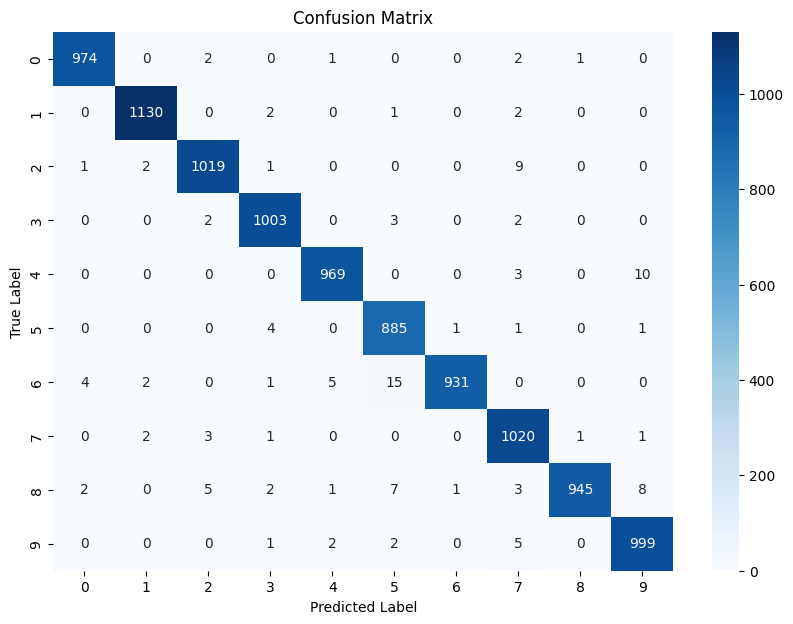


Number of learnable parameters in the model: 107302


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# CNN Model Architecture
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        # Convolutional layers
        self.net = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=3),  # First Conv Layer
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),  # MaxPooling
            nn.Conv2d(128, 64, kernel_size=3),  # Second Conv Layer
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),  # MaxPooling
#             nn.Conv2d(128, 64, kernel_size=3),  # Third Conv Layer
#             nn.ReLU(),
#             nn.MaxPool2d((2, 2), stride=2)  # MaxPooling
        )
        # Fully connected layer (classification head)
        self.classification_head = nn.Sequential(
            nn.Linear(64*25, 20, bias=True),  # Adjusted size for the fully connected layer
            nn.ReLU(),
            nn.Linear(20, 10, bias=True)  # Output layer: 10 classes (digits 0-9)
        )

    def forward(self, x):
        # Pass through convolutional layers
        features = self.net(x)
        # Flatten the feature map to pass it to the fully connected layers
        features = features.view(features.size(0), -1)

        # Pass through classification head
        return self.classification_head(features)


# Load the MNIST dataset with necessary transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model, loss function, and optimizer
model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Function to calculate the number of learnable parameters in the model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Training the model
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update parameters
            running_loss += loss.item()

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader)}")


# Function to evaluate the model and compute confusion matrix
def evaluate(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds)
            all_labels.append(labels)

    # Concatenate all predictions and labels
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    # Compute confusion matrix
    cm = confusion_matrix(all_labels.numpy(), all_preds.numpy())

    return cm


# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()


# Training the model
train(model, train_loader, criterion, optimizer, epochs=5)

# Evaluate the model and get confusion matrix
conf_matrix = evaluate(model, test_loader)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, classes=[str(i) for i in range(10)])

# Number of learnable parameters in the model
num_params = count_parameters(model)
print(f"\nNumber of learnable parameters in the model: {num_params}")

Epoch [1/5], Loss: 0.3415103833506833
Epoch [2/5], Loss: 0.10877878718358129
Epoch [3/5], Loss: 0.07873625080185587
Epoch [4/5], Loss: 0.06464674706230246
Epoch [5/5], Loss: 0.05455354829929444
Epoch [1/5], Loss: 0.23122110605728366
Epoch [2/5], Loss: 0.07141286236688749
Epoch [3/5], Loss: 0.052578667136428475
Epoch [4/5], Loss: 0.040601229556572575
Epoch [5/5], Loss: 0.031662766482877254
Epoch [1/5], Loss: 0.1967705288859231
Epoch [2/5], Loss: 0.0633247382390295
Epoch [3/5], Loss: 0.04472195322293096
Epoch [4/5], Loss: 0.03524823194122198
Epoch [5/5], Loss: 0.02748059897817693


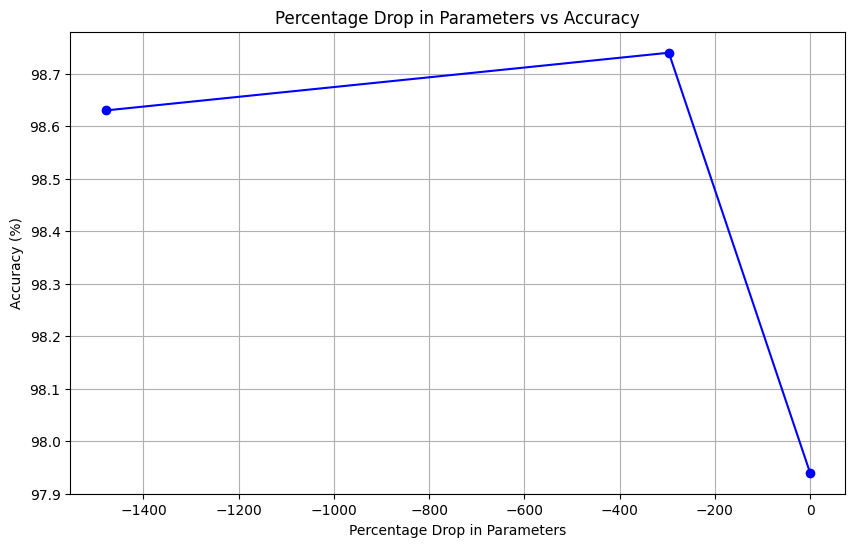

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

class CNNClassifier(nn.Module):
    def __init__(self, conv1_out_channels=32, conv2_out_channels=64, conv3_out_channels=32, fc1_out_features=20):
        super(CNNClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, conv1_out_channels, kernel_size=3),  # First Conv Layer
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),  # MaxPooling
            nn.Conv2d(conv1_out_channels, conv2_out_channels, kernel_size=3),  # Second Conv Layer
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),  # MaxPooling
            nn.Conv2d(conv2_out_channels, conv3_out_channels, kernel_size=3),  # Third Conv Layer
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)  # MaxPooling
        )
        self.classification_head = nn.Sequential(
            nn.Linear(conv3_out_channels, fc1_out_features, bias=True),
            # Adjusted size for the fully connected layer
            nn.ReLU(),
            nn.Linear(fc1_out_features, 10, bias=True)  # Output layer: 10 classes (digits 0-9)
        )

    def forward(self, x):
        # Pass through convolutional layers
        features = self.net(x)
        # Flatten the feature map to pass it to the fully connected layers
        features = features.view(features.size(0), -1)
        # Pass through classification head
        return self.classification_head(features)


# Load the MNIST dataset with necessary transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Define the model, loss function, and optimizer
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Function to train the model
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update parameters
            running_loss += loss.item()

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader)}")


# Function to evaluate the model and compute accuracy
def evaluate(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy


# Train models with different configurations and track performance
def experiment_with_parameters():
    results = []
    filter_configs = [
        (32, 64, 32, 20),  # Lower filters and neurons
        (64, 128, 64, 40),  # Slightly more filters
        (128, 256, 128, 80),  # More filters and neurons
    ]

    for conv1_out_channels, conv2_out_channels, conv3_out_channels, fc1_out_features in filter_configs:
        model = CNNClassifier(conv1_out_channels, conv2_out_channels, conv3_out_channels, fc1_out_features)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Train the model
        train(model, train_loader, criterion, optimizer, epochs=5)

        # Evaluate the model
        accuracy = evaluate(model, test_loader)

        # Get the number of parameters in the model
        num_params = count_parameters(model)

        # Track the results
        results.append({
            'accuracy': accuracy,
            'num_params': num_params,
            'conv1_out_channels': conv1_out_channels,
            'conv2_out_channels': conv2_out_channels,
            'conv3_out_channels': conv3_out_channels,
            'fc1_out_features': fc1_out_features
        })

    return results


# Run the experiments
results = experiment_with_parameters()

# Prepare data for plotting
accuracies = [result['accuracy'] for result in results]
param_counts = [result['num_params'] for result in results]

# Calculate percentage drop in parameters compared to the first model
initial_params = param_counts[0]
param_drops = [100 * (initial_params - p) / initial_params for p in param_counts]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_drops, accuracies, marker='o', linestyle='-', color='b')
plt.title('Percentage Drop in Parameters vs Accuracy')
plt.xlabel('Percentage Drop in Parameters')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

Epoch [1/5], Loss: 0.02367848105790557
Epoch [2/5], Loss: 0.02078476608198265
Epoch [3/5], Loss: 0.018176501997527968
Epoch [4/5], Loss: 0.014425896745378539
Epoch [5/5], Loss: 0.01368267615114878
Accuracy: 99.04%


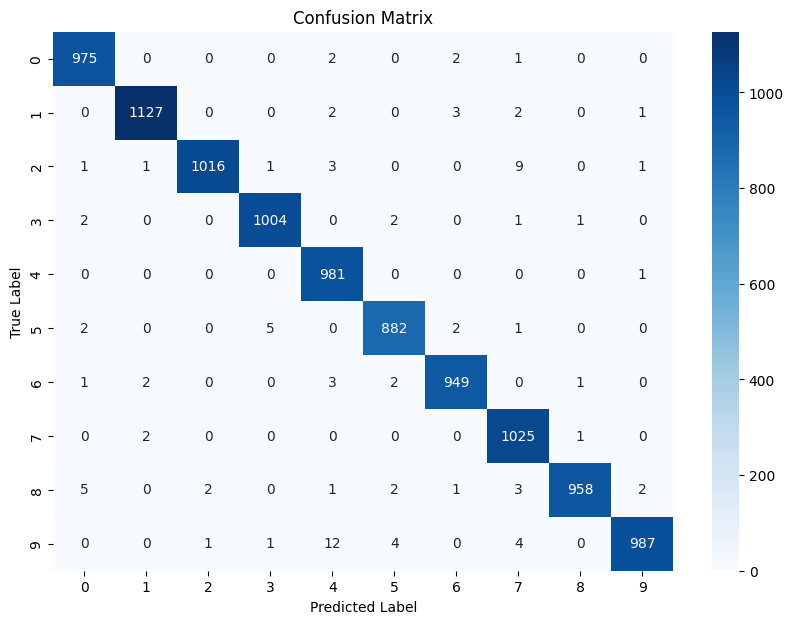


Number of learnable parameters in the model: 107302


In [18]:
# Function to evaluate the model and compute confusion matrix and accuracy
def evaluate(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds)
            all_labels.append(labels)

            # Calculate correct predictions
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    # Concatenate all predictions and labels
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    # Compute confusion matrix
    cm = confusion_matrix(all_labels.numpy(), all_preds.numpy())

    # Calculate accuracy
    accuracy = correct / total * 100
    print(f"Accuracy: {accuracy:.2f}%")

    return cm

# Training the model
train(model, train_loader, criterion, optimizer, epochs=5)

# Evaluate the model and get confusion matrix
conf_matrix = evaluate(model, test_loader)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, classes=[str(i) for i in range(10)])

# Number of learnable parameters in the model
num_params = count_parameters(model)
print(f"\nNumber of learnable parameters in the model: {num_params}")
